# **Практическая работа №2:**
**Тема работы:**

Исследование задач о раскрасках.

**Цель работы**

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

**Постановка задачи. Вариант 36**

Круг разбит на 66 секторов, каждый из которых покрашен в один из 5 цветов. Сколькими способами можно составить такую мозаику? Аналитически решить задачу о раскрасках. Графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения
**Подстановка** — это элемент симметрической группы. 
**Цикл** — это подстановка, такая, что на подмножестве $ {a_{i_1} ... a_{i_n}} $ множества $M$:
$\bigg(\begin{matrix}a_{i_1}&...&a_{i_n}\\a_{i_2}&...&a_{i_1}\end{matrix}\bigg) = (a_{i_1} ... a_{i_n})$

**Независимые циклы** — это циклы, которые применяются на непересекающихся подмножествах.

**Теорема 1**

Рассмотрим подстановку $\sigma$ длины $k$, которая порождает $S_n$. Каждая подстановка $\sigma \neq e \in S_n$ является произведением независимых цилов и это произведение однозначно.

**Следствие:** Порядок подстановки $\sigma = НОК$ длин независимых циклов, входящих в $\sigma$.


Рассмотрим группу $G$, имеющую нейтральный элемент $e$, и множество $X$. Говорят, **что $G$ действует на $X$**, если выполнимы равенства:
$\forall x \in X, \forall g, h \in G: \newline 1)ex =x \newline 2)gh(x)=g(h(x))$

**Орбитой** элемента $x \in X$ под действием $G$ называется множество $Gx = (gx: g \in G)$.
Число $|G_x|$ является **длиной орбиты**.

**Неподвижные точки** для $g \in G$ — это точки $x \in X$ для которых выполняется равенство: $gx=x$. Множество неподвижных точек для элемента $g$ обозначается следующим образом: $X^g$

**Лемма Бёрнсайда**

Количество орбит действия $G$ на множестве $X$: $ N = \frac{1}{(|G|)}\sum\limits_{g \in G}|X^g|$

**Задача о раскраске**

Задачу о раскраске можно решить с помощью перестановок и обозначенных выше теорем. Рассмотрим $I$ — произвольное множество и $C$ — множество цветов.

**Раскарска множества** — это функция из $I$ в $C$: $\varphi: I \rightarrow C$.
Множество всех раскрасок $C^I$.

Пусть $G$ — группа на множестве $I$. Тогда $g(f(i)) = f(g^{-1}i)$ — где $g \in G, i \in I, f \in C^I$

Для элемента $g \in G$ и функции $f \in C^I$ выполняются равенства:

$1)gf = f \newline 2)f(i)=f(g^ni) — i \in I, n \in Z \newline 3)\varphi(g)\Longrightarrow f(i)=f(j) $ для $ i, j \in I $в одном цикле в циклической перестановке

**Следствие**

Количество раскрасок $C^I$, которые сохраняют элемент $g$ равно $|C^{c(\varphi(g))}|$ — где $c(\varphi)$ количество независимых циклов в $\varphi$.

**Лемма 2**

Рассмотрим $\sigma$ — цикл длины $k$, $НОД(k, n) = d \Rightarrow \sigma^n$ является произведением $d$ циклов длины $\frac{k}{d}$.

Так как при рассмотрении всевозможных вариантов существует возможность получить одинаковый результат, необходимо учитывать этот момент в решении. Раскраски задают одинаковые наборы, когда они лежат в одной орбите под действием множества $G$. Значит задача сводится к нахождению количества орбит действия группы $G$  на множество $C^I$. 
## Выполнение работы
### Аналитическое решение

Круг разбит на 66 секторов, каждый из которых покрашен в один из 5 цветов $\Rightarrow$ всего вариантов для раскраски $=5^{66}$ по комбинаторной формуле. Учитывая, что задача требует от нас решения с точность до поворота круга, то из всех вариантов существуют одинаковые, которые необходимо отсечь. Сведём задачу к нахождению количества орбит действия группы $G$  на множество $C^I$ по лемме Бёрнсайда.

В нашем случае достаточно рассмотреть операцию поворота на 1 сектор: $\sigma$

$e = \bigg(\begin{matrix}1&2&3&...&65&66\\1&2&3&...&65&66\end{matrix}\bigg) = (1)(2)(3)...(65)(66)$
$\newline \sigma = \bigg(\begin{matrix}1&2&3&...&65&66\\2&3&4&...&66&1\end{matrix}\bigg) = (1, 2, 3, ..., 66) $
$\newline \sigma^2 = \bigg(\begin{matrix}1&2&3&...&65&66\\3&4&5&...&1&2\end{matrix}\bigg) = (1, 3, 5, ..., 63, 65)(2, 4, 6, ..., 64, 66) $
$\newline ...$
$\newline \sigma^k = \bigg(\begin{matrix}1&2&3&...&66\\(1+k)mod(66)&(2+k)mod(66)&(3+k)mod(66)&...&(66+k)mod(66)\end{matrix}\bigg)$
$\newline ...$
По лемме 2 нам необходимо посчитать количество циклов в перестановке $\sigma^n$ — где $n = 0, 1, 2, ..., 65$:

In [1]:
#зададим параметры задачи:
cycleLen = 66 #количество секторов
colorNum = 5 #количество цветов

gcdDict = {} #{НОД: [степень_i, степень_j,...], ...}
for n in range(cycleLen):
    gcd = GCD(cycleLen, n)     #найдём НОД(k, n) 
    if gcd in gcdDict.keys():  #добавим в map
        gcdDict[gcd].append(n)
    else:
        gcdDict[gcd] = [n]

print(" d\t| Количество циклов:\t| n:") 
print("--------|-----------------------|-------------")
for pair in gcdDict.items():
    print(f"{pair[0]}\t| {len(pair[1])}\t\t\t| {pair[1]}")

 d	| Количество циклов:	| n:
--------|-----------------------|-------------
66	| 1			| [0]
1	| 20			| [1, 5, 7, 13, 17, 19, 23, 25, 29, 31, 35, 37, 41, 43, 47, 49, 53, 59, 61, 65]
2	| 20			| [2, 4, 8, 10, 14, 16, 20, 26, 28, 32, 34, 38, 40, 46, 50, 52, 56, 58, 62, 64]
3	| 10			| [3, 9, 15, 21, 27, 39, 45, 51, 57, 63]
6	| 10			| [6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
11	| 2			| [11, 55]
22	| 2			| [22, 44]
33	| 1			| [33]


Исходя из следствия можно найти количество раскрасок, которые сохраняет $g \in G$. Это будут неподвижные точки.

In [2]:
print(" d\t| C^I:\t| n:") 
print("--------|-------|-------------")
for pair in gcdDict.items():
    print(f"{pair[0]}\t| {colorNum}^{pair[0]}\t| {pair[1]}")

 d	| C^I:	| n:
--------|-------|-------------
66	| 5^66	| [0]
1	| 5^1	| [1, 5, 7, 13, 17, 19, 23, 25, 29, 31, 35, 37, 41, 43, 47, 49, 53, 59, 61, 65]
2	| 5^2	| [2, 4, 8, 10, 14, 16, 20, 26, 28, 32, 34, 38, 40, 46, 50, 52, 56, 58, 62, 64]
3	| 5^3	| [3, 9, 15, 21, 27, 39, 45, 51, 57, 63]
6	| 5^6	| [6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
11	| 5^11	| [11, 55]
22	| 5^22	| [22, 44]
33	| 5^33	| [33]


Теперь с помощью леммы Бёрнсайда можно найти количество орбит действия на $G$.

In [3]:
N = 1/cycleLen
summ = 0
for pair in gcdDict.items():
    summ += len(pair[1])*colorNum**pair[0]
print(f"N = {N*summ}")

N = 205341320546497051895352673124255556050250975


### Графическое отображение решения задачи

# 

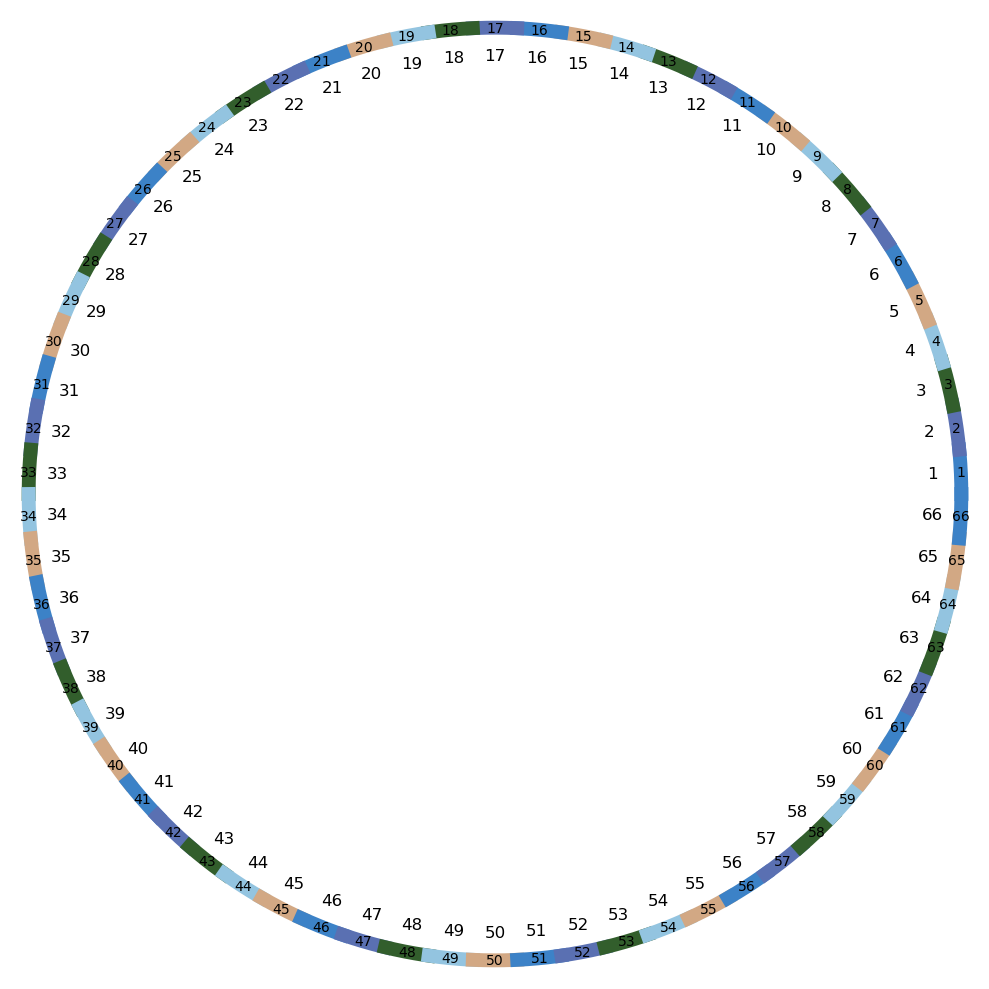

In [32]:
scale = cycleLen

def genColors(colorList, colorNum):
    while len(colorList) < colorNum:
        R = random() % 1
        G = random() % 1
        B = random() % 1
        color = (R, G, B)
        if color not in colorList:
            colorList.append(color)
        

class Sector():
    def __init__(self, color, pos, num):
        self.color = color
        self.num = num
        self.pos = pos
    
    def getSector(self, rotation = 0):
        graph = Graphics()
        self.pos = (self.num - rotation) % cycleLen
        graph += polar_plot(cos(x), (x, self.pos*pi/scale, (self.pos+1)*pi/scale), thickness = 10, color = self.color, axes = False)
        graph += text(self.num+1, (0.5*cos((self.pos + 1/2)*2*pi/scale) + 0.5, 0.5*sin((self.pos+1/2)*2*pi/scale)), color = 'black')
        graph += text(self.pos+1, (0.47*cos((self.pos + 1/2)*2*pi/scale) + 0.5, 0.47*sin((self.pos+1/2)*2*pi/scale)), fontsize = 12, color = 'black')
        return graph            

    
class Circle():
    def __init__(self):
        self.sectors = []
        self.degree = 0
        
    def append(self, sector):
        self.sectors.append(sector)
        
    def rotate(self, degree):
        self.degree = degree
        
    def printCircle(self):
        circleGraph = Graphics()
        for sec in self.sectors:
            circleGraph += sec.getSector(self.degree)
        circleGraph.show(figsize=[10, 10])
    
circle = Circle()
colorIndex = 0
colorList = []
genColors(colorList, colorNum)
for n in range(scale):
    colorIndex = (colorIndex + 1) % colorNum
    circle.append(Sector(colorList[colorIndex], n, n))
circle.printCircle()
#print(colors.ColorsDict)

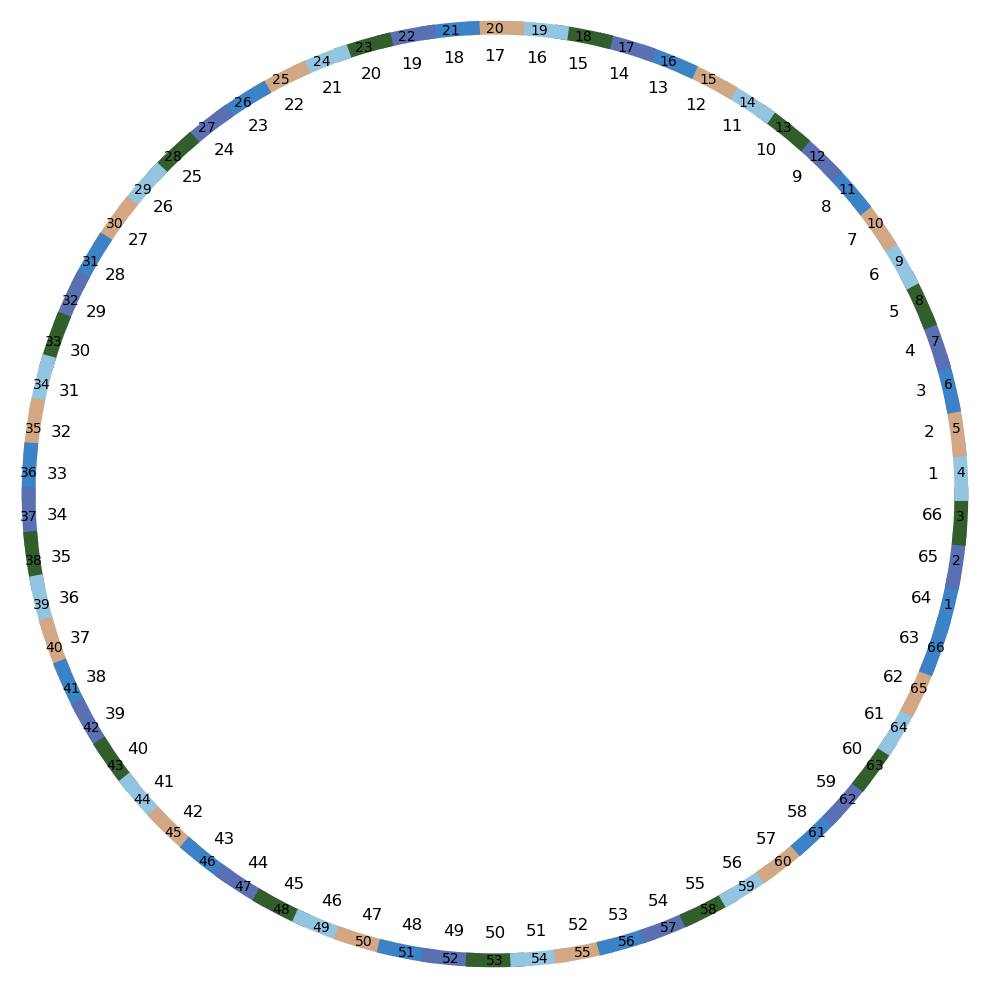

In [33]:
circle.rotate(69)
circle.printCircle()

### Решение в общем виде

Пусть $p$ — количество цветов, $m$ — количество секторов круга. 

Для решения задачи необходимо подсчитать коилчество орбит действия по лемме Бёрнсайда, но для этого необходимо посчитать порядок группы неподвижных точек $X^g = C^I$. Для этого: 
1) Для $n \in [0; m - 1]$ посчитаем по следствию сколько циклов $\sigma$ соответствуют одному и тому же значению $d = НОД(m, n)$. Получим для каждого $d_i$ набор из $k_i$ независимых циклов.

2) Проведём подсчёты необходимых величин для леммы: 
$\newline \sum C^I = d_i*p^{k_i}$
$\newline |G| = p^m$

3) По лемме Бёрнсайда подсчитаем количество орбит: $ N = \frac{1}{(|G|)}\sum C^I$

### Выводы


В ходе лабораторной работы были на практике закреплены навыки по решению задачи о раскраске на примере раскраски круга, разбитого на сектора. Программно были реализованы подсчёты и визуализация, было выполнено решение задачи в общем виде.